# Dependencies ; print version 
python --version


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import os

In [2]:
# Always make sure you have set in your notebook

path = "../data/"

def get_imlist(path):
    """Returns a list of filenames for all jpg images in a directory"""
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

In [3]:
# This creates a list with path to all the files in the directory where you have the images 
my_path = get_imlist(path)

In [4]:
my_path[0]

'../data/ed-van.jpg'

In [5]:
pil_im = Image.open(my_path[0])

In [6]:
# read the image to numpy array for plotting --- color image in numpy form 
img = np.array(pil_im)

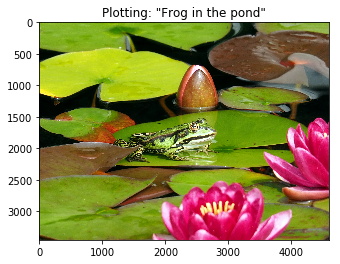

In [7]:
# add title and show the plot 
title('Plotting: "Frog in the pond"')
plt.imshow(img)
show()   # Last after all images that you want to display 

# A very useful feature: Histogram to look at pixel intensity ; This works on single channel only, so apply on GS channel here 

In [8]:
# creating Grayscale version 
my_hist_im = np.array(pil_im.convert('L'))


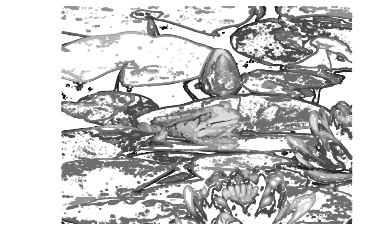

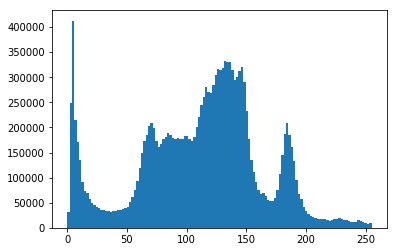

In [9]:
# create a new figure 
figure()
# donot use color
gray()
# show contours with original upper left corner
contour(my_hist_im,origin='image')
axis('equal')
axis('off')

figure()
hist(my_hist_im.flatten(),128)   # histogram works on 1D array so we need to flatten the rows*columns of the image
show()

In [10]:
# How to get the size of an image ; I picked img as i had already converted it from PIL to numpy array 
print (img.shape)
# clearly a color image ;let us store the H and W to variables for future purposes 
m,n,p = img.shape


(3456, 4608, 3)


In [11]:
print ("Height:{},Width:{},Color_channels:{}".format(m,n,p))
print (img.dtype)

Height:3456,Width:4608,Color_channels:3
uint8


# Blurring : A very important Computer Vision technique

In [ ]:
# we do this normally at the top , but we will import for understanding purposes here 

In [13]:
from scipy.ndimage import filters

In [ ]:
# I am opening , same image that was grayscaled 

In [14]:
my_hist_im.shape  # this is grayscale- one channel

(3456, 4608)

# Refer this link to learn about Gaussian Blur
https://en.wikipedia.org/wiki/Gaussian_blur

In [15]:
im2 = filters.gaussian_filter(my_hist_im,5)  # 5 is the std deviation in the equation. 

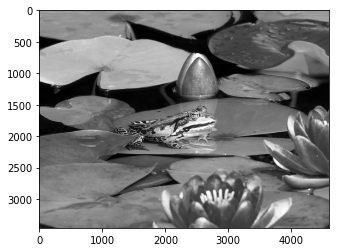

In [16]:
plt.imshow(im2,cmap='gray')
show()

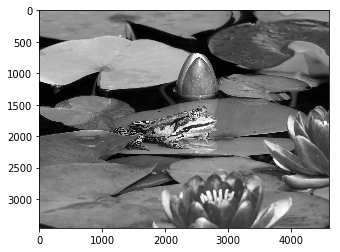

In [17]:
# Let us smooth with 1 sigma and observe the results 
im2 = filters.gaussian_filter(my_hist_im,1)
plt.imshow(im2,cmap='gray')
show()

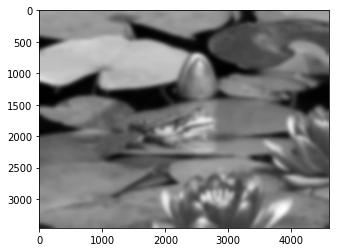

In [19]:
# very large sigma == 30 
im2 = filters.gaussian_filter(my_hist_im,30)  
plt.imshow(im2,cmap='gray')
show()

# Let us apply Gaussian Blur on our original color image. It is a bit of a lengthy process. 



In [29]:
img0 = np.zeros(img.shape)   # we have to first creat a zero matrix array same shape as our original color image array
img0.shape
for i in range(3):
    img0[:,:,i] = filters.gaussian_filter(img[:,:,i],30)
img0 = uint8(img0)

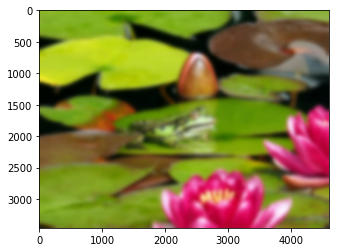

In [30]:
# display image
plt.imshow(img0)
show()

# Exploring Image Derivatives : Convolving an Image with a mask/kernal/filter in 2D space (x,y) by doing partial derivatives and coming up with a vector 2D  

In [31]:
# Two famous filters are pewitt and Sobel . 
# 1D mask is [-1,0,1],[-2,0,-2],[-1,0,1] ; variation in x direction 
# 1D mask in varuation in y direction same in vertical directon  ( column )
# we will be using sobel and pewitt filters 
#Sobel derivative  , it is along the width which is 2nd index in the shape tuple
imx = np.zeros(my_hist_im.shape) # operates on grayscale
filters.sobel(my_hist_im,1,imx)



array([[  0.,   4.,   4., ..., -11.,  -8.,  -4.],
       [  1.,   4.,   3., ...,  -9.,  -8.,  -4.],
       [  2.,   4.,   2., ...,  -8.,  -9.,  -5.],
       ...,
       [  0.,   3.,  11., ..., -12.,  -9.,  -4.],
       [ -1.,   1.,   8., ..., -11., -10.,  -4.],
       [ -3.,   0.,   5., ...,  -9.,  -9.,  -4.]])

In [32]:
# sobel in y direction
imy = np.zeros(my_hist_im.shape)
filters.sobel(my_hist_im,0,imy)
magnitude = np.sqrt(imx**2,imy**2)

In [34]:
magnitude.shape

(3456, 4608)

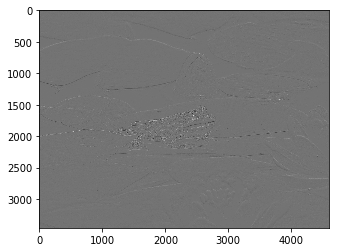

In [38]:


plt.imshow(imy)   # thin outline of the frog here is seen 
show()

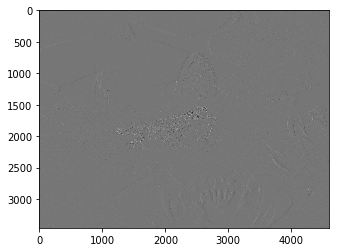

In [39]:
plt.imshow(imx)  # this image has not many edges , in the sense more areas of solid color 
show()

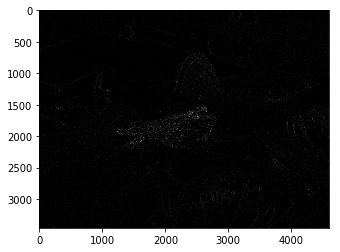

In [40]:
plt.imshow(magnitude)
show()

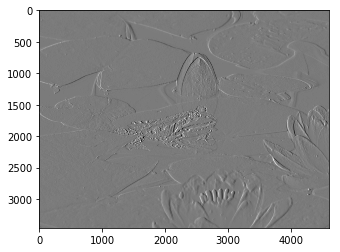

In [46]:
# we are doing gaussian partial derivates here 
sigma = 5
imx = np.zeros(my_hist_im.shape)
filters.gaussian_filter(my_hist_im,(sigma,sigma),(0,1),imx)

imy = np.zeros(my_hist_im.shape)
filters.gaussian_filter(my_hist_im,(sigma,sigma),(1,0),imy)

## Display filters now 
plt.imshow(imx)

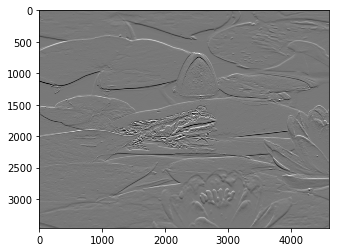

In [47]:
plt.imshow(imy)

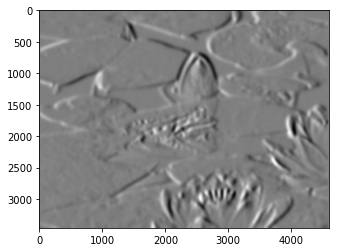

In [48]:
# we can change sigma and see how we can see the texture and depth of the pond,lotus and frog in these images 
# Let us try  with sigma 25
sigma = 25
imx = np.zeros(my_hist_im.shape)
filters.gaussian_filter(my_hist_im,(sigma,sigma),(0,1),imx)

imy = np.zeros(my_hist_im.shape)
filters.gaussian_filter(my_hist_im,(sigma,sigma),(1,0),imy)

## Display filters now 
plt.imshow(imx)

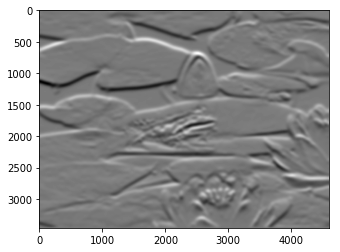

In [49]:
plt.imshow(imy)  # the gaussian derivative filter which is applying smoothing operating on sobel x and sobel y !

# Simple Morphing ; ( mathematical morphology), analyzing  and measuring basic shapes in images . we apply this on binary or grayscale images .By applying a threshold to pixel values we can get 0 or 1 in our binary image .you can learn more on this link..https://en.wikipedia.org/wiki/Mathematical_morphology


In [51]:
# convert gray scale, then threshold with 128pixel intensity ( gray scale is between 0 to 255)
from scipy.ndimage import measurements,morphology

In [52]:
# we already have gray scled frog and pond image, so we will use the same
img_mor = 1*(my_hist_im<128)   # multiplying by 1 onverts boolean to binary array

In [54]:
labels,nbr_objects = measurements.label(img_mor)
print ("Number of Objects in the pond imager are :{}".format(nbr_objects))

Number of Objects in the pond imager are :6682


In [58]:
# we have too many objects, we can rduce the objects number by giving neighboring distances to consider
# morphology: opening to seperate objects better
im_open = morphology.binary_opening(img_mor,ones((9,5)),iterations=2)

In [59]:
labels_open,nbr_objects_open = measurements.label(im_open)
print ("Number of Objects:{}".format(nbr_objects_open))

Number of Objects:208


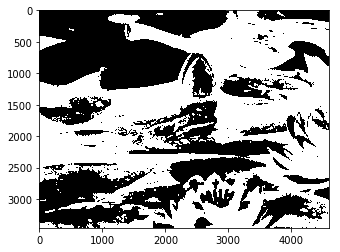

In [60]:
plt.imshow(im_open)  # the (9 aand 5)are neighborhood pixels in height, width directions , 
#means 4 pixel above and 4 pixel below the pixel in verical direction and 5 pixel in the horizontal direction. 
#This is done through out the binary image 